In [1]:
import jax.numpy as jnp
import jax
import jax.random as jr

from optimizers.gd import SGDState, sgd_step
from optimizers.mrcg import MRCGState, mrcg_step
import matplotlib.pyplot as plt
from model_zoo import rosenbrock_loss, beale_loss

from models.cali_housing import batched_loss_at_params, initial_params, TOTAL_SAMPLES

In [2]:
full_loss_at_params = batched_loss_at_params(TOTAL_SAMPLES)
def iterate_alg(max_iters, initial_state, step_fn, verbose=False) -> list:
    losses = []
    state = initial_state
    key = jr.PRNGKey(0)
    for i in range(max_iters):
        loss = full_loss_at_params(state.params, key)
        losses.append(loss)

        state = step_fn(state)
        if verbose:
            print(f"Iteration {i}: Loss = {loss} Params = {state.params}")
    return losses

In [6]:
from matplotlib.pyplot import plot
from numpy import full
key = jr.key(1)

loss_functions = [(f"{100*r:.1f}%", batched_loss_at_params(int(r*TOTAL_SAMPLES))) for r in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5] ]


def plot_comparison(methods, iterations = 100):
    results = {}
    for name, initial_state, step_fn in methods:
        losses = iterate_alg(iterations, initial_state, step_fn, verbose=False)
        results[name] = losses

    plt.figure(figsize=(10, 5))
    for name, losses in results.items():
        plt.plot(losses, label=name)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('')
    plt.yscale('log')
    plt.legend()
    plt.ylim(0.4, 10)
    # Show horizontal line at　0.4
    # plt.axhline(y=optimal_loss, color='r', linestyle='--', label='Target Loss (0.4)')


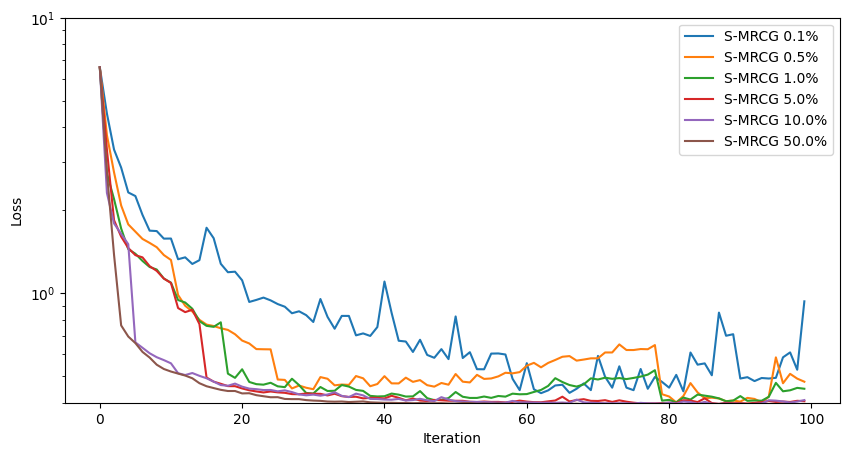

In [4]:

methods = [(f"S-MRCG {name}", MRCGState(initial_params, loss_ap, key), mrcg_step) for name, loss_ap in loss_functions]
plot_comparison(methods)

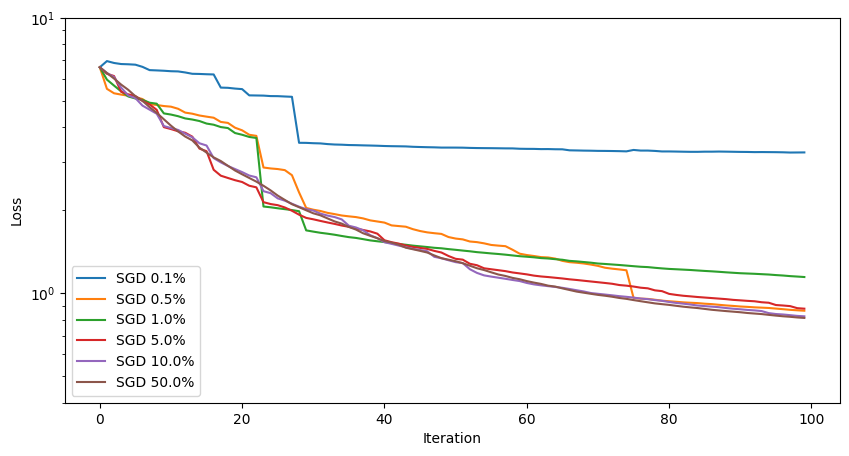

In [7]:
def step_size(n):
    return 0.01
    # return 0.05 / (n+1)**.5
methods = [(f"SGD {name}", SGDState(initial_params, loss_ap, step_size, key), sgd_step) for name, loss_ap in loss_functions]
plot_comparison(methods, iterations=100)